In [4]:
import pandas as pd
df = pd.read_csv('iris.csv',header=None)
df.columns = ['PL','PW','SL','SW','Target']
df.shape
df.head()

,PL,PW,SL,SW,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#step1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PL      150 non-null    float64
 1   PW      150 non-null    float64
 2   SL      150 non-null    float64
 3   SW      150 non-null    float64
 4   Target  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['Target'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Target, dtype: int64

In [8]:
dict={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df1=df
df1['Target']=df1['Target'].map(dict)
df1['Target'].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

In [10]:
from sklearn.datasets import load_iris
data=load_iris()
x=data.data
y=data.target
print(x.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
print((y==0).sum())     # .sum()    for adding all y terms
import numpy as np
print(np.unique(y))

50
[0 1 2]


In [13]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(150, 4)
(105, 4)
(45, 4)


In [22]:
# model
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc=',train_acc)
print('Testing Acc=',test_acc)

Training Acc= 0.8952380952380953
Testing Acc= 0.8


In [24]:
print((y_test!=y_test_pred).sum())

9


In [26]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.50      0.67        18
           2       0.61      1.00      0.76        11

    accuracy                           0.80        45
   macro avg       0.83      0.83      0.79        45
weighted avg       0.87      0.80      0.79        45



In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[16,  0,  0],
       [ 2,  9,  7],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

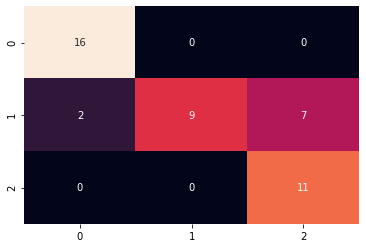

In [28]:
import seaborn as sns 
sns.heatmap(cm,annot=True,cbar=False)

In [29]:
# model
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc=',train_acc)
print('Testing Acc=',test_acc)

Training Acc= 0.9809523809523809
Testing Acc= 0.9777777777777777


C:\Users\Shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# support vector machine
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc=',train_acc)
print('Testing Acc=',test_acc)

Training Acc= 0.9714285714285714
Testing Acc= 0.9777777777777777


In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_train_pred)
test_acc=accuracy_score(y_test,y_test_pred)
print('Training Acc=',train_acc)
print('Testing Acc=',test_acc)

Training Acc= 0.9714285714285714
Testing Acc= 0.9777777777777777


In [ ]:
#ensemble has three parts - bagging,boosting,stacking(bagging is better than boosting)

In [42]:
###compare the performance of different classifiers 
from sklearn.linear_model import Perceptron,LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier#cart rd3 c4.5 algorithm
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier
clf1=Perceptron()
clf2=LogisticRegression()
clf3=SVC()
clf4=KNeighborsClassifier()
clf5=GaussianNB()
clf6=DecisionTreeClassifier()
clf7=RandomForestClassifier()
clf8=BaggingClassifier()
clf9=ExtraTreesClassifier()
clf10=AdaBoostClassifier()
clf11=GradientBoostingClassifier()
clf12=VotingClassifier(estimators=[('per',clf1),('dt',clf6),('ada',clf10)],voting='hard')
clf=[clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10,clf11,clf12]
name=['per','LR','SVC','KNN','GNB','DT','RF','BAG','ET','ADA','GBC','VT']
accuracy={}
for model,model_name in zip(clf,name):
    model.fit(x_train,y_train)
    acc=accuracy_score(model.predict(x_test),y_test)
    accuracy[model_name]=acc
print(accuracy)

C:\Users\Shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'per': 0.8, 'LR': 0.9777777777777777, 'SVC': 0.9777777777777777, 'KNN': 0.9777777777777777, 'GNB': 1.0, 'DT': 0.9777777777777777, 'RF': 0.9777777777777777, 'BAG': 0.9777777777777777, 'ET': 0.9777777777777777, 'ADA': 0.9111111111111111, 'GBC': 0.9777777777777777, 'VT': 0.9777777777777777}


In [43]:
for i,j in accuracy.items():
    print(i,':',j)

per : 0.8
LR : 0.9777777777777777
SVC : 0.9777777777777777
KNN : 0.9777777777777777
GNB : 1.0
DT : 0.9777777777777777
RF : 0.9777777777777777
BAG : 0.9777777777777777
ET : 0.9777777777777777
ADA : 0.9111111111111111
GBC : 0.9777777777777777
VT : 0.9777777777777777


regression : ex- stock market (continous)
we cant find accuracy in regression // we find MSE mean sq error.
linear regression is a regression but logistic regression is a classifiers
in linear cost function = SSE
LASSO REG:  COST=SSE+L1
RIDGE REG: COST=SSE+L2
ELASTIC NET ERROR: COST=SSE+L1+L2
We use regularisation to stop overfitting.
SVR:- Support vector regressor